# Insurance document helper AI using llama

Semantic Search and Question answering for Insurance documents

## Problem Statement

Insurance documents like policies and claims are complex and lengthy, making it difficult for users to find specific information or get answers to their queries. Traditional keyword-based search fails to capture the contextual meaning of user questions and legal jargon. The goal is to build a **semantic search and Q/A system** that understands the intent behind queries and provides precise answers from these documents.

## Why LlamaIndex is Ideal

1. **Document Indexing & Chunking:**  
   LlamaIndex breaks documents into smaller chunks for efficient search and retrieval, ensuring relevant context is available for Q/A.

2. **Semantic Search with Embeddings:**  
   It supports embedding-based search, matching user queries to semantically related chunks, even if phrased differently.

3. **Context-Aware Q/A:**  
   Retrieved chunks are used to ground responses, ensuring that the model answers based on actual document content without hallucinations.

4. **Scalable & Flexible Storage:**  
   LlamaIndex integrates with vector databases like FAISS and Pinecone, making it suitable for large datasets. For this project we are going to use the default simple in-memory vector store, that llama provides

5. **Custom Retrieval Pipelines:**  
   It allows building hierarchical indices for better retrieval in structured documents, like policies with multiple sections.

With **LlamaIndex**, you can build a reliable, fast, and scalable Q/A system tailored to insurance documents.


## Overall System Design
### Retrieval Augmented Generation (RAG)
RAG enhances LLMs by adding your data to their knowledge. It works by **indexing** your data and filtering it for relevant context when queried, which is passed along with the prompt to the LLM for a response.

#### RAG Stages

##### `Loading`
- **Nodes & Documents**: Documents hold data (e.g., PDFs, APIs). Nodes are chunks of documents with metadata.
- **Connectors**: Read data from sources into Documents and Nodes.

##### `Indexing`
- **Indexes**: Organize data with vector embeddings stored in vector databases.
- **Embeddings**: Convert queries into numerical representations to find relevant data.

##### `Querying`
- **Retrievers**: Fetch relevant context from indexes for queries.
- **Routers**: Select retrievers based on query metadata.
- **Postprocessors**: Refine retrieved data through filtering and ranking.
- **Response Synthesizers**: Generate responses using the query and retrieved data.

#### Applications
- **Query Engines**: Answer questions over your data.
- **Chat Engines**: Enable conversational interactions with your data.
- **Agents**: Automate complex tasks with decision-making capabilities using LLMs.


#### LlamaIndex Usage
- We don't want to build RAG from scratch, as maintaince and taking care of optimiazations is a nightmare.
- Building RAG has standard steps and we don't want to re-invent the wheel.
- LlamaIndex is the leading data framework for building LLM applications that makes it easy to build RAG.


#### **Simple Directory Reader**
- The SimpleDirectoryReader is the most commonly used data connector that just works. We will be using this to read PDF files.

##### **Vector Store Index**
- Vector Stores are a key component of retrieval-augmented generation (RAG) and so you will end up using them in nearly every application you make using LlamaIndex, either directly or indirectly.
- Vector stores accept a list of Node objects and build an index from them
- The simplest way to use a Vector Store is to load a set of documents and build an index from them using from_documents. We will be using this.

##### **Query Engine**
- Query engine is a generic interface that allows you to ask question over your data.
- A query engine takes in a natural language query, and returns a rich response. It is most often (but not always) built on one or many indexes via retrievers. You can compose multiple query engines to achieve more advanced capability.

#### **Response and Evaluation**
- We will get response in the natural language, which will be human evaluated as good, bad or neutral response.

The OpenAI language model is used to interact with these messages, and the response is printed.

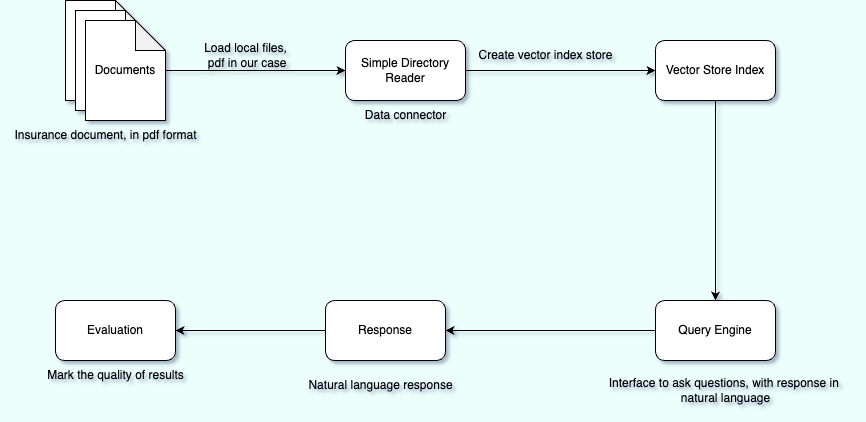


In [21]:
!pip install llama-index
!pip install pypdf
!pip  install PyMuPDF 
!pip install openai

In [22]:
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

In [34]:
openai.api_key = os.getenv("OPEN_AI_PERSONAL_API_KEY")

In [35]:
from llama_index.core import SimpleDirectoryReader

`SimpleDirectoryReader` is the simplest way to load data from local files into LlamaIndex. For production use cases it's more likely that you'll want to use one of the many Readers available on LlamaHub, but SimpleDirectoryReader is a great way to get started.

In [36]:
reader = SimpleDirectoryReader(input_dir="./pdfs")

Each document from reader represents a page, as we can see that there are 64 pages in the insurance document.

In [37]:
documents = reader.load_data()
print(f"Loaded {len(documents)} docs")

Loaded 64 docs


In [38]:
documents

[Document(id_='be7156ed-a18e-4d0c-beb3-ce81b3ed195b', embedding=None, metadata={'page_label': '1', 'file_name': 'Principal-Sample-Life-Insurance-Policy.pdf', 'file_path': '/Users/nikhil/Documents/Masters/segment-spotter/pdfs/Principal-Sample-Life-Insurance-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 222772, 'creation_date': '2024-10-12', 'last_modified_date': '2024-10-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n  \n \n \nGROUP POLICY FOR:  \nRHODE ISLAND JOHN DOE  \n \nALL MEMBERS  \nGroup Member Life Insurance  \n \nPrint Date: 07/16/2014  \n DOROTHEA GLAUSE  S655  \nRHODE ISLAND JOHN DOE  01/01/2014  \n711 HIGH STREET   \nGEORGE RI 02903   \n  \n \n \n                                       ', mimetype='text/plain', start_char

In [70]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from IPython.display import display, HTML

# documents --> nodes--> embeddings(vectors)
# create parser and parse document into nodes, and then convert them to the embeddings.
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)
index = VectorStoreIndex(nodes)


# For defaults, we could have directly used docuements to  build index
# nodes --> index
# index = VectorStoreIndex(documents)

# Construct Query Engine
query_engine = index.as_query_engine(similarity_top_k=3)

In [71]:
nodes[0]

TextNode(id_='18d9fa97-c72b-4494-8c92-cdae1961bc56', embedding=None, metadata={'page_label': '1', 'file_name': 'Principal-Sample-Life-Insurance-Policy.pdf', 'file_path': '/Users/nikhil/Documents/Masters/segment-spotter/pdfs/Principal-Sample-Life-Insurance-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 222772, 'creation_date': '2024-10-12', 'last_modified_date': '2024-10-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='be7156ed-a18e-4d0c-beb3-ce81b3ed195b', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '1', 'file_name': 'Principal-Sample-Life-Insurance-Policy.pdf', 'file_path': '/Users/nikhil/Documents/Masters/segment-spotter/pdfs/Principal-Sample-Life-Insurance-Policy.pdf', '

We are using 

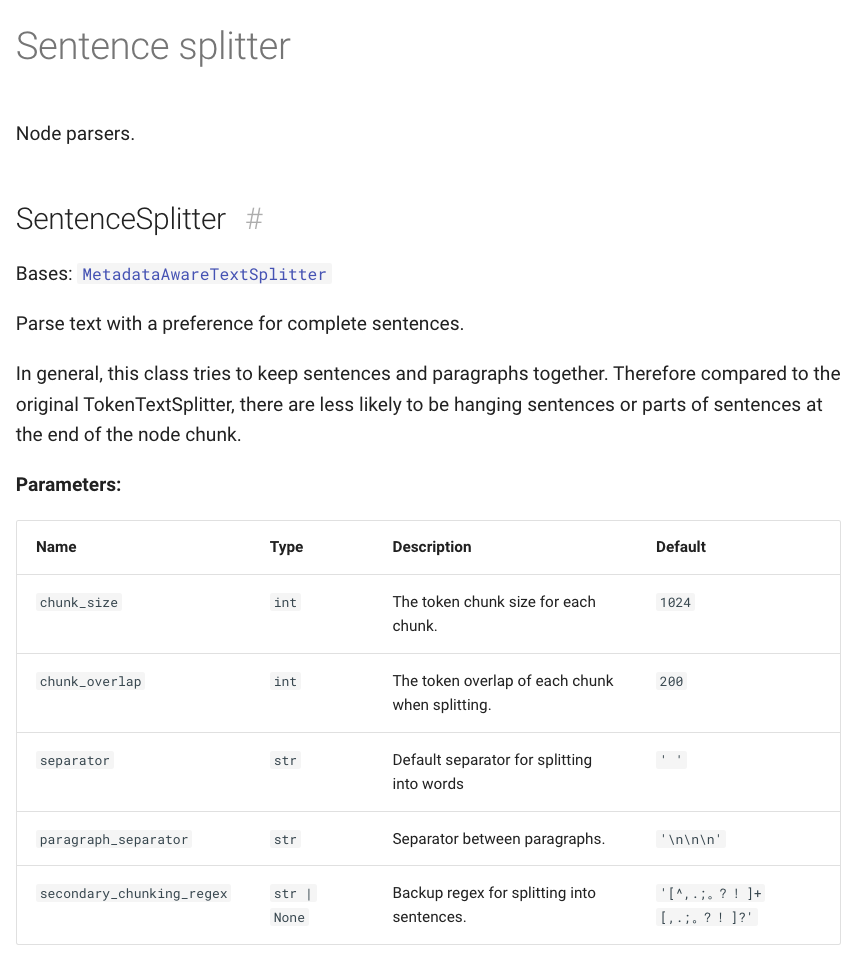

In [72]:
parser

SentenceSplitter(include_metadata=True, include_prev_next_rel=True, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x32baae1e0>, id_func=<function default_id_func at 0x17b2267a0>, chunk_size=1024, chunk_overlap=200, separator=' ', paragraph_separator='\n\n\n', secondary_chunking_regex='[^,.;。？！]+[,.;。？！]?')

In [73]:
response = query_engine.query("What the document name?")

In [74]:
response.response

'Principal-Sample-Life-Insurance-Policy'

In [75]:
response.source_nodes[0].metadata['page_label']

'2'

In [76]:
response.source_nodes[1].score

0.7840769700436628

In [77]:
def query_response(user_input):
  response = query_engine.query(user_input)
  file_name = response.source_nodes[0].node.metadata['file_name']
  page_no = response.source_nodes[0].metadata['page_label']
  final_response = response.response + '\n Check further at ' + file_name + ' document' +'page no ' + page_no
  return final_response

We have created a simple program, you will be prompted to ask question in the text box, once done, type "exit" and Enter.

In [78]:
def initialize_conv():
  print('Feel free to ask Questions regarding Principal Sample life insurance. Press exit once you are done')
  while True:
    user_input = input()
    print(user_input)
    if user_input.lower() == 'exit':
      print('Exiting the program.')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:12pxW">{response}</p>'))

In [79]:
initialize_conv()

Feel free to ask Questions regarding Principal Sample life insurance. Press exit once you are done
What is the insurance for senior citizen?


exit
Exiting the program.


#### Evaluation
- We will be storing a set of questions.
- We will create a dataframe of questions and responses with feedback.
- We will be using human feedback.

In [60]:
questions = ['What is the insurance policy for person greater then 30 years old?', "What is the insurance for death by accident?",
             'What is the policy coverage in case of deceased partner?']

In [61]:
import pandas as pd

In [62]:
def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    test_feedback.append((i,query_response(i),user_input))
  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Good or Bad'])
  return feedback_df

In [65]:
testing_pipeline(questions)

What is the insurance policy for person greater then 30 years old?
The insurance policy for a person greater than 30 years old includes eligibility for Member Life Insurance after completing 30 consecutive days of continuous Active Work with the Policyholder as a Member. Additionally, they may be eligible for Member Accidental Death and Dismemberment Insurance and Dependent Life Insurance based on specific criteria outlined in the policy.
 Check further at Principal-Sample-Life-Insurance-Policy.pdf documentpage no 26

 Please provide your feedback on the response provided by the bot
What is the insurance for death by accident?
The insurance for death by accident includes an additional benefit of $10,000 that will be paid to the beneficiary named for Member Life Insurance if the Member loses their life as a result of an accidental injury sustained while driving or riding in an Automobile. This benefit is provided that all Benefit Qualifications are met, the Automobile is equipped with f

,Question,Response,Good or Bad
0,What is the insurance policy for person greate...,The insurance policy for a person greater than...,good
1,What is the insurance for death by accident?,The insurance for death by accident includes a...,good
2,What is the policy coverage in case of decease...,Payment will be made to the person named as be...,good


### Documentation


#### Project Goals
The project aims to develop a robust Generative Search System for answering queries from complex insurance policy documents. The traditional keyword search is inadequate due to the legal jargon and verbosity in policies. This project leverages LlamaIndex to implement semantic search that understands context and delivers precise answers.

#### Data Sources
The data sources include PDFs of insurance policies and claim documents. These documents were loaded using SimpleDirectoryReader from LlamaIndex, which handles directory-based PDF reading and document parsing. For this exercise we have used the document provided by UpGrad

#### Design Choices
- **Document Loading:** SimpleDirectoryReader was used to load multiple PDFs, offering simple document management.
- **Chunking:** The default chunking and splitting mechanism was employed using a sentence splitter to ensure that each document was broken down logically.
- **Indexing:** The documents were transformed into nodes and indexed using VectorStoreIndex for efficient retrieval and semantic search.
- **Query Engine:** We configured the query engine to return the top 3 most relevant documents (similarity_top_k=3) for each user query, ensuring focused and accurate responses.
- **Evaluation:** Human feedback was utilized to evaluate the system, which resulted in positive outcomes and satisfactory answers to user queries.

##### Challenges
The primary challenge was handling document structure and ensuring the system did not hallucinate answers. Leveraging LlamaIndex's chunking and semantic search capabilities overcame this issue.


